# Attempt to Reverse-Engineer Prime Meridian Argument for Jupiter

L.N. Fletcher

Based on IDL code provided by Data Reduction Manager (DRM) - B. Fisher & G. Orton

**Code isn't giving correct answers right now**

In [1]:
import numpy as np
import matplotlib.pyplot as plt



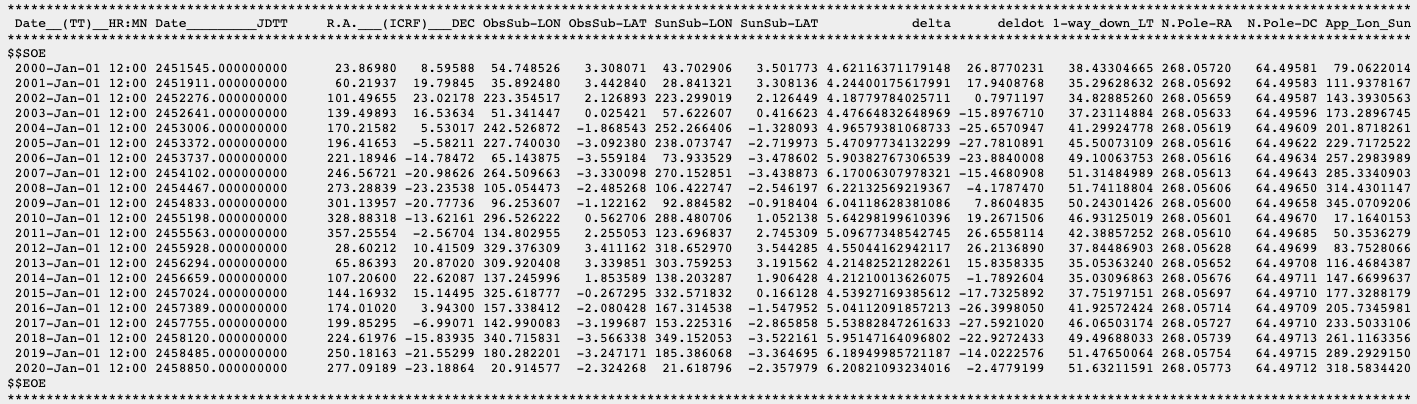

In [10]:
# Hard coding for 2020-01-01T12:00TT

longE=20.91 # Central meridian longitude (System III)
days=0.

# Rotation rates of three jovian longitude systems
wt3=870.5360000
wt2=870.2700354
wt1=877.9000354

#a= RA of planet in degrees
a=277.09189

#d= DEC of planet in degrees
d=-23.18864

#a1= North Pole RA
a1=268.05773

#d1= North Pole Dec
d1=64.49712

# delta = Geocentric distance in AU
delta=6.2082

d2r=np.pi/180.
r2d=180./np.pi

In [18]:

# Jovicentric latitude of Earth:
#From IDL code planetlcm.pro
#Be=asind(-sind(d1)*sind(d)-cosd(d1)*cosd(d)*cosd(a1-a))  

sd1=np.sin(d1*d2r)
sd=np.sin(d*d2r)
cd1=np.cos(d1*d2r)
cd=np.cos(d*d2r)
ca1a=np.cos((a1-a)*d2r)
sa1a=np.sin((a1-a)*d2r)

arg=(-sd1*sd - cd1*cd*ca1a)
Be=np.arcsin(arg)

print("Sub-Earth Latitude (jovicentric):",Be*r2d)

cBe=np.cos(Be)

# Correction term for jovicentric longitude of sub-earth point
# From IDL code planetlcm.pro
#K=atan2d((-cosd(d1)*sind(d)+sind(d1)*cosd(d)*cosd(a1-a))/cosd(Be),(cosd(d)*sind(a1-a))/cosd(Be))

arg1= (-cd1*sd+sd1*cd*ca1a)/cBe
arg2= (cd*sa1a)/cBe

#atan2d = double(atan(x1,x2)*57.2958), i.e.  the angle in degrees whose tangent is x2/x1.  

K=np.arctan2(arg1,arg2)*r2d

print("Longitude Correction K:",K)

# Argument of prime meridian at the time of observation andedated by light time.
#W1=W0+Wt*(days-.0057755d0*delta)
w1=K+longE

w03=w1-wt3*(days-0.0057755*delta)

#w03=np.mod(w03,360.)

print("Calculated Argument of Prime Meridian (0.0 TT of year):",w03)
print("DRM Suggests w03=284.63 for 2020-01-01T12:00TT")


Sub-Earth Latitude (jovicentric): -2.0327373840044487
Longitude Correction K: 98.30420441200951
Calculated Argument of Prime Meridian (0.0 TT of year): 150.4276723550871
DRM Suggests w03=284.63 for 2020-01-01T12:00TT
